In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up some parameters for pretty plots
import matplotlib as mpl
sns.set_style('whitegrid')
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'

from sklearn.linear_model import Lasso

In [2]:
def lasso_sequence_ridge(X, y, lambda_, num_iterations):
    n_samples, N = X.shape  # the number of features and samples
    w = np.ones(N)  # initialize the weights
    w_history = []  # list to store the history of weights

    # Scaleing lambda to match the Lasso definition used by scikit learn
    lambda_scaled = lambda_  * n_samples
    for i in range(num_iterations):
        D = np.diag(1/np.abs(w))  # diagonal matrix of absolute weights
        # solve the normal equations
        w = np.linalg.inv(X.T @ X + lambda_scaled * D) @ X.T @ y
        w_history.append(w)

    return np.array(w_history)

# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# standardize the features 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# L_1 regularization parameter
lambda_ = 0.1

# learn
num_iterations = 20
w_history = lasso_sequence_ridge(X, y, lambda_, num_iterations)

w_normal=w_history/w_history[0]

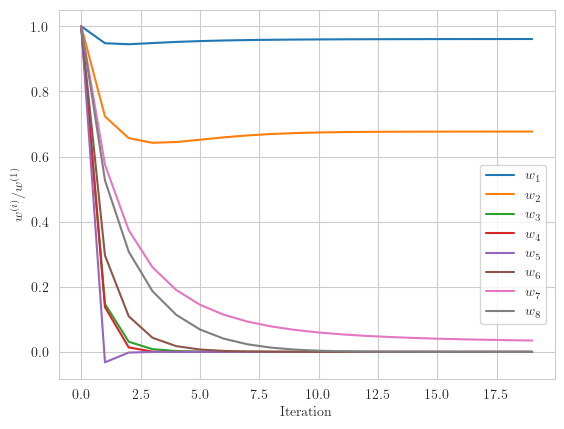

In [3]:
# Plot the evolution of each weight over iterations
for i in range(w_history.shape[1]):
    plt.plot(w_normal[:, i], label=f'$w_{i+1}$')
# plt.yscale('log')
plt.xlabel(r'Iteration')
plt.ylabel(r'${w}^{(i)}/w^{(1)}$')
plt.legend(loc=(0.85,0.15))

plt.savefig('/Users/nadavoutmezguine/Library/CloudStorage/Dropbox/Mac/Documents/Nadav-out.github.io/assets/images/lasso_conv.png',dpi=300, bbox_inches='tight', transparent=True)

plt.show()

In [4]:
# Compare to Lasso as implamented in scikit-learn
lasso = Lasso(alpha=lambda_)
lasso.fit(X, y)

print("Final weights from Lasso:")
print([f'{x:.3f}' for x in lasso.coef_])
print("Final weights from sequence of Ridge regressions:")
print([f'{x:.3f}' for x in w_history[-1]])


Final weights from Lasso:
['0.706', '0.106', '-0.000', '-0.000', '-0.000', '-0.000', '-0.011', '-0.000']
Final weights from sequence of Ridge regressions:
['0.705', '0.106', '-0.000', '-0.000', '-0.000', '-0.000', '-0.014', '-0.000']
